In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# read the dataset
dataset = pd.read_excel('../../DataSet/Telco_customer_churn.xlsx')

In [3]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

## Clean and Prepare the data

In [4]:
# taking only the required columns which are Contract and Churn Value
dataset = dataset[['Contract','Churn Value']]

In [5]:
# checking for null values
dataset.isnull().sum()

Contract       0
Churn Value    0
dtype: int64

In [6]:
dataset.dtypes

Contract       object
Churn Value     int64
dtype: object

## Taking a sample

         Contract  Churn Value  percentage
0  Month-to-month            0   57.692308
1  Month-to-month            1   42.307692
2        One year            0   82.608696
3        One year            1   17.391304
4        Two year            0   92.000000
5        Two year            1    8.000000


<AxesSubplot:xlabel='Contract', ylabel='percentage'>

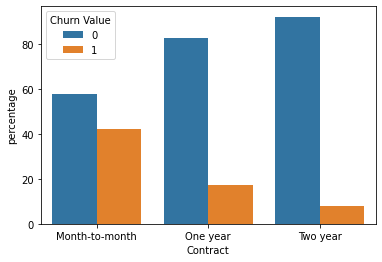

In [14]:
# let's take a random sample of 100 records
dataset = dataset.sample(n=100, random_state=0)

# calculate the proportion of churn value for each contract type
contract_churn = dataset.groupby(['Contract'])['Churn Value'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

# print the proportion of churn value for each contract type
print(contract_churn)

# plot the proportion of churn value for each contract type
sns.barplot(x="Contract", y="percentage", hue="Churn Value", data=contract_churn)



### given that the proportion of churned customers for the contract type Month-to-Month is significantly higher than the other two contract types, Are customers with Month-to-Month contracts more likely to churn than customers with other contract types?

<AxesSubplot:xlabel='Contract', ylabel='count'>

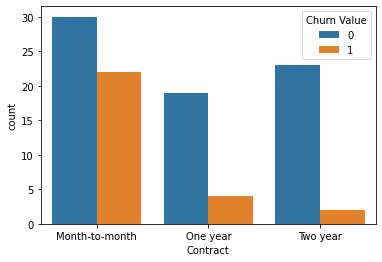

In [15]:
# visualizing the distribution of all contract types vs churn value
sns.countplot(x='Contract', hue='Churn Value', data=dataset)

### Obviously customers with Month-to-Month contracts have the highest churn rate so we expect that after doing some analysis we will be able to reach this fact again without having the whole dataset (population).

In [16]:
# take a stratified sample of the dataset
sample_size = 100
stratified_sample = dataset.groupby('Contract', group_keys=False).apply(lambda x: x.sample(int(len(x) * sample_size/len(dataset))))

In [17]:
stratified_sample['Contract'].value_counts()

Month-to-month    52
Two year          25
One year          23
Name: Contract, dtype: int64

In [18]:
month_group = stratified_sample[stratified_sample['Contract'] == 'Month-to-month']
one_year_group = stratified_sample[stratified_sample['Contract'] == 'One year']
two_year_group = stratified_sample[stratified_sample['Contract'] == 'Two year']

### We will answer the question on two similar steps:

**1. first infer that the proportion of churned customers for the contract type Month-to-Month is significantly higher than that of customers with contract type One year.**

**2. second infer that the proportion of churned customers for the contract type Month-to-Month is significantly higher than that of customers with contract type Two year.**

**3. either conclude that the churn rate of customers with Month-to-Month contracts is significantly higher than that of customers with other contract types or not.**

## Defining the Hypothesises for step 1:
**1. Customers with contracts of type Month-to-Month more likely to churn than those with contract type One year**

**2. Null Hypothesis H0: customers with contracts of type Month-to-Month have churn rate less than or equal to those with contracts one year**

**3. Alternative Hypothesis H1: customers with contracts of type Month-to-Month have churn rate larger than those with contracts one year**